# Image Classification with Cifar-10 Dataset Using CNN on Tensorflow

&emsp;&emsp;In this notebook, I am going to make a classifier for CIFAR-10 Dataset using Convolutional Neural Network. The classifier is CNN based model. The CNN model should be feed with the images that has been preprocessed and normalized first. The classifier should then test the test set and make a classification of each test set. This notebook was run in NVIDIA GTX 1050, and intel Core i5 with cuda 10.1, cudnn 10.1, using tensorflow 1.13.1

&emsp;&emsp; The purpose of this notebook is to introduce the implementation of tensorflow for Convolutional Neural Network. This notebook will cover simple explanation about the layers, activation, loss function, and optimizer that I used. This notebook is not suitable for those who are already expert in Machine Learning/Deep Learning. This notebook is go for a great accuracy.

# Get the Dataset

&emsp;&emsp;The dataset of Cifar-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz)
. For a simplicity purpose, I have combined and cleaned the datasets so all that is left is just images and labels. To combined and clean the datasets you can use pickle package. Go check [this blogspot](https://luckydanny.blogspot.com/2016/07/load-cifar-10-dataset-in-python3.html) .

&emsp;&emsp;First import the preprocessing library that will be useful for our project. Pandas package is use for data structure and data manipulation. preprocessing package from sklearn is used to normalize our images. train_test_split package is used to split our dataset as test images, train images, and validation images.<br>

For the pandas user-guide, you can check out [here](http://pandas.pydata.org/pandas-docs/stable/user_guide/index.html) <br>
For the sklearn documentation, you can check out [here](https://scikit-learn.org/stable/)

In [0]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

&emsp;&emsp;Read the dataset (images and labels) then store it in dataset variable. Our images size is 32x32x3 = 3072 columns.Colored image has 3 layers as shown below :
<img src="250px-RGBLayers.svg.png" style="width: 200px; height: 200px;"> <br>
Each layer has 32x32 = 1024 pixels. Since it is RGB image, then it has 3 layers consist of Red, Green, and Blue layers.<br> 
&emsp;&emsp;In our dataset. The 1st until the 3072th columns is the pixel, while the last column is our labels. We store the images (pixel) in X_data variable and the labels in y_data variable. <br>
Lets print out the first five rows of our images and labels. Since the index in python starts from 0, so to show first 5 rows ,then we should print out the index of 0-4

In [9]:
#dataset = pd.read_csv("dataset.csv")
X_data = dataset.iloc[:, :-1].values
print("Our images samples : ")
print(pd.DataFrame(X_data).head(5))

y_data = dataset.iloc[:, -1].values
print("Our labels samples : ")
print(pd.DataFrame(y_data).head(5))

Our images samples : 
   0     1     2     3     4     5     ...  3066  3067  3068  3069  3070  3071
0    59    62    63    43    46    45  ...   151   118    84   123    92    72
1   154   177   187   126   137   136  ...   143   134   142   143   133   144
2   255   255   255   253   253   253  ...    79    85    83    80    86    84
3    28    25    10    37    34    19  ...    63    56    37    72    65    46
4   170   180   198   168   178   196  ...    71    75    78    73    77    80

[5 rows x 3072 columns]
Our labels samples : 
   0
0  6
1  9
2  9
3  4
4  1


Our labels is an integer from 0 - 9 which is stand for : <br>
- airplane   : 0 <br>
- automobile : 1 <br>
- bird       : 2 <br>
- cat        : 3 <br>
- deer       : 4 <br>
- dog        : 5 <br>
- frog       : 6 <br>
- horse      : 7 <br>
- ship       : 8 <br>
- truck      : 9

&emsp;&emsp; By translating the number labels from our label's dictionary, we can definitely say that our first image is frog, the second image is truck, the third image is truck, the fourth image is deer, and so on. To prove that, we can also visualize the image. But you should notice that our image is just 32 x 32 pixel so it will be blurry for our sight. We take the fifth image from our dataset as our sample image. To visualize the image, we should first reshape our sample image from the shape of (_,3072) into (_,32,32,3). Then we visualize the image using matplotlib package.

Our shape of random image :  (3072,)
Our new shape of images :  (32, 32, 3)

Our label is :  1
Our image is :


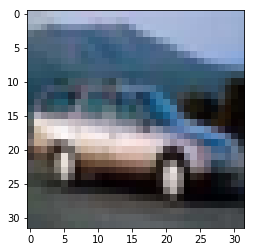

In [10]:
sample_img= X_data[4]
sample_label = y_data[4]

print("Our shape of random image : ",sample_img.shape)

sample_img = sample_img.reshape(32, 32, 3) #Reshape our sample image
print("Our new shape of images : ", sample_img.shape)

import matplotlib.pyplot as plt #Import oyr matplotlib package
%matplotlib inline

plt.imshow(sample_img) #Visualize the image
print()
print("Our label is : ", sample_label)
print("Our image is :")

# Preprocess the Data

&emsp;&emsp;The first preprocess step is to normalize our data (images). In our project, this step is an optional step, since all the features(pixel) is in the same range. Each pixel has value range 0 - 255. We normalize the data using preprocessing library from sklearn. To check know more about the importance of normalization, you can check out this [medium article](https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029) <br>
&emsp;&emsp;For the labels, we would like to one hot encode it. One hot encoding is a process to change categorical variables into a form that could provide better result for the CNN model. Instead of having values 0 - 9 for the labels, it will have 10 columns, and each column represents each objects. To understand it more about one hot encoder and how it works, lets print out the labels before and after one hot encoded. <br>
&emsp;&emsp;After that, we split our data, 70% for training data, 15% for validation data, and 15% for testing data. Since the data has been spread randomly, we do not need to randomise our splitting data.

In [13]:
X_data = preprocessing.normalize(X_data) #Normalize our images (Optional  process)

img_size = 32
num_channel = 3 #RGB
X_data = X_data.reshape(len(dataset), img_size, img_size, num_channel) #WxH = 32x32, RGB

'''Data Splitting Process'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size = 0.3, random_state = 0) #split train data for 0.7
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0) #split test data for 0.15 and val data for 0.15

print("Image-labels frequency in Training Data")
print(pd.Series(y_train).value_counts())
print()

print("Image-labels frequency in Testing Data")
print(pd.Series(y_test).value_counts())
print()

print("Image-labels frequency in Validation Data")
print(pd.Series(y_val).value_counts())
print()

'''One Hot Encoding Process'''
print ("Labels before One-hot Encoded")
print(pd.DataFrame(y_train).head(5))
print()

y_train = pd.get_dummies(y_train) #One hot encode our labels
y_test = pd.get_dummies(y_test) #One hot encode our labels
y_val = pd.get_dummies(y_val) #One hot encode our labels
print("Labels after One-hot Encoded")
print(pd.DataFrame(y_train).head(5))

Image-labels frequency in Training Data
6    3545
8    3519
4    3517
3    3509
5    3501
7    3486
2    3486
0    3486
9    3477
1    3474
dtype: int64

Image-labels frequency in Testing Data
9    780
1    764
0    761
2    750
6    748
5    747
7    741
4    740
3    738
8    731
dtype: int64

Image-labels frequency in Validation Data
7    773
2    764
1    762
3    753
0    753
5    752
8    750
9    743
4    743
6    707
dtype: int64

Labels before One-hot Encoded
   0
0  4
1  4
2  2
3  2
4  1

Labels after One-hot Encoded
   0  1  2  3  4  5  6  7  8  9
0  0  0  0  0  1  0  0  0  0  0
1  0  0  0  0  1  0  0  0  0  0
2  0  0  1  0  0  0  0  0  0  0
3  0  0  1  0  0  0  0  0  0  0
4  0  1  0  0  0  0  0  0  0  0


# Create the CNN Model, Loss, and Optimizer

To create the CNN model we will be using Tensorflow. Our CNN architecture as shown below : <br>
<img src="convnets.png">  <br>
&emsp;&emsp;This architecture use the leaky relu activation function for the hidden layers and softmax activation function in the output layer. Since we want to classify based on 10 different objects, then our final layer should have 10 nodes. Each node represent 1 object. In this example, the CNN architecture is built on 13 layers (1 input layer + 11 hidden layers + 1 output layer). Hidden layers consist of Convolution layer, max pooling layer, and Fully-Connected Layer. <br>
- Convolution Layer : <br>
&emsp;&emsp;Convolution Layer works differently from the ordinary fully connected (FC) layer. FC layer requires the input matrix/array to be in 1-dimension. If we have RGB image with size of 28 x 28, means that we have 3 matrixes with each matrix's size is 28x28. For FC layer we should flatten all those matrixes so that we have a single row of matrix with size of 28x28x3 = 2352. Whereas in convolution layer, we doesnt need to flatten our matrix, because the work of convolution layer (Conv2D) is by taking 2 dimensions of matrix directly. Here is a detail work of Convolution 2D layer works :
<img src="conv_input.png">
<img src="conv_layer.gif">

&emsp;&emsp;The reason why we use convolution layer is because conv layer is more likely to be able to capture the spatial and temporal dependencies in an image 
&emsp;&emsp;through the application of relevant filters. For more explanation about convolution layer, you can check out this [article](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) 
<br><br>

- Pooling Layer : <br>
Pooling layer is designed to reduce the spatial size of the convolved features. Frankly speaking, you can also use Convolution layer to reduce its spatial size by increasing the stride size. But people tend to use max-pooling layer to reduce the spatial size. Max pooling works by reducing kxk size into a single matrix by taking the maximum value in the kxk matrix. For easier explanation, you can see this animation, taken from [here](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) article.
<img src="pooled_layer.gif">
In this illustration. The input is 5x5 matrix is max pooled by 3x3 ksize, yielding 3x3 matrix.<br><br>

- Fully Connected Layer : <br>
"The fully connected (FC) layer in the CNN represents the feature vector for the input. The convolution layers before the FC layer(s) hold information regarding local features in the input image such as edges, blobs, shapes, etc. Each conv layer hold several filters that represent one of the local features. The FC layer holds composite and aggregated information from all the conv layers that matters the most." Cited from [here](https://www.quora.com/What-happens-in-the-fully-connected-layer-in-a-convolutional-neural-network)
<img src="fully_connected.png"> <br>

- Leaky ReLU Activation : <br>
<img src="leaky_relu.png">

&emsp;&emsp;&emsp;&emsp;Unlike ReLU that eliminate the negative part of the function, Leaky ReLU does not completely vanish it. Leaky ReLU just reduce the magnitude of it 
&emsp;&emsp;by multiply it with 0.01 . Leaky ReLU tackles the vanishing gradient problem, and also there is no longer saturation region. For more information about 
&emsp;&emsp;vanishing gradient, you can check this [article](https://ayearofai.com/rohan-4-the-vanishing-gradient-problem-ec68f76ffb9b) <br>

&emsp;&emsp;The architecture of CNN is hyperparameter, you can modify it till you get the best model's accuracy. To check the best Convnets architecture, you can check out the collection of the research's paper [here](https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)

In [ ]:
import tensorflow as tf
def Convnet (X):
    conv_W1 = tf.get_variable('conv_W1', initializer = tf.truncated_normal(shape = [3,3,3,32], mean = 0, stddev = 0.1))
    conv_b1 = tf.get_variable('conv_b1', initializer = tf.truncated_normal(shape = [32]))
    conv1 = tf.nn.conv2d(X,conv_W1, strides = [1,1,1,1], padding = 'SAME') + conv_b1
    conv1 = tf.nn.leaky_relu(conv1)

    conv_W2 = tf.get_variable('conv_W2', initializer = tf.truncated_normal(shape = [3,3,32,48], mean = 0, stddev = 0.1))
    conv_b2 = tf.get_variable('conv_b2', initializer = tf.truncated_normal(shape = [48]))
    conv2 = tf.nn.conv2d(conv1, conv_W2, strides = [1,1,1,1], padding = 'SAME') + conv_b2
    conv2 = tf.nn.leaky_relu(conv2)

    max_pool1 = tf.nn.max_pool(conv2, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

    conv_W3 = tf.get_variable('conv_W3', initializer = tf.truncated_normal(shape = [3,3,48,80], mean = 0, stddev = 0.1))
    conv_b3 = tf.get_variable('conv_b3', initializer = tf.truncated_normal(shape = [80]))
    conv3 = tf.nn.conv2d(max_pool1, conv_W3, strides = [1,1,1,1], padding = 'SAME') + conv_b3
    conv3 = tf.nn.leaky_relu(conv3)

    conv_W4 = tf.get_variable('conv_W4', initializer = tf.truncated_normal(shape = [3,3,80,80], mean = 0, stddev = 0.1))
    conv_b4 = tf.get_variable('conv_b4', initializer = tf.truncated_normal(shape = [80]))
    conv4 = tf.nn.conv2d(conv3, conv_W4, strides = [1,1,1,1], padding = 'SAME') + conv_b4
    conv4 = tf.nn.leaky_relu(conv4)

    max_pool2 = tf.nn.max_pool(conv4, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')

    conv_W5 = tf.get_variable('conv_W5', initializer = tf.truncated_normal(shape = [3,3,80,128], mean = 0, stddev = 0.1))
    conv_b5 = tf.get_variable('conv_b5', initializer = tf.truncated_normal(shape = [128]))
    conv5 = tf.nn.conv2d(max_pool2, conv_W5, strides = [1,1,1,1], padding = 'SAME') + conv_b5
    conv5 = tf.nn.leaky_relu(conv5)
    
    conv_W6 = tf.get_variable('conv_W6', initializer = tf.truncated_normal(shape = [3,3,128,128], mean = 0, stddev = 0.1))
    conv_b6 = tf.get_variable('conv_b6', initializer = tf.truncated_normal(shape = [128]))
    conv6 = tf.nn.conv2d(conv5, conv_W6, strides = [1,1,1,1], padding = 'SAME') + conv_b6
    conv6 = tf.nn.leaky_relu(conv6)
    
    max_pool3 = tf.nn.max_pool(conv6, ksize = [1,2,2,1], strides = [1,2,2,1], padding = 'SAME')
    
    fc1 = tf.contrib.layers.flatten(max_pool3)

    W1 = tf.get_variable('W1', initializer = tf.truncated_normal(shape = [2048,500], mean = 0, stddev = 0.1))
    b1 = tf.get_variable('b1', initializer = tf.truncated_normal(shape = [500]))
    fc1 = tf.matmul (fc1, W1) + b1
    fc1 = tf.nn.leaky_relu(fc1)

    W2 = tf.get_variable('W2', initializer = tf.truncated_normal(shape = [500,10], mean = 0, stddev = 0.1))
    b2 = tf.get_variable('b2', initializer = tf.truncated_normal(shape = [10]))
    logit = tf.matmul(fc1, W2) + b2
    
    return logit

&emsp;&emsp;We store the images and labels that we will assign to the model in placeholder. X for the images and y for the labels. Placeholder in tensorflow are used to feed external data into TensorFlow graph. <br> Check out [this](https://www.quora.com/What-is-the-difference-between-Variables-and-Placeholders-in-tensor-flow) Q&A discussion in quora for detail explanation about TensorFlow's placeholder.<br><br>
logits is the final node in our model before it feeds to the final activation function (softmax activation)

In [15]:
tf.reset_default_graph() #To make sure that we do not overlap any variables in the graph
X = tf.placeholder(tf.float32, shape = [None, 32,32,3]) #X placeholder
y = tf.placeholder(tf.int32, shape = [None,10]) #y placeholder

logits = Convnet(X)

W0615 14:44:22.509925 140653830354816 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0615 14:44:22.512106 140653830354816 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/layers/python/layers/layers.py:1634: flatten (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
Instructions for updating:
Use keras.layers.flatten instead.


We will be using the categorical_cross_entropy as our loss function and Adam as our optimizer. We update our model's weights and bias by reducing our loss function.
- Categorical Cross Entropy : <br>
$$L = - \sum\limits_{i} y_i \log {P_i}$$
$$ y_i = Ground Truth $$
$$P_i = model's Prediction$$

&emsp;&emsp;&emsp;&emsp;Cross entropy computes the distance between the distribution that the model's predict and with the ground truth distribution. It is widely used when 
&emsp;&emsp;node activations can be understood as representing the probability that each hypothesis might be true, i.e. when the output is a probability distribution. 
&emsp;&emsp;Thus it is used as a loss function in neural networks which have softmax activations in the output layer. To find out more about the cross entropy loss and 
&emsp;&emsp;its derivative with softmax activation function, check this [article](https://gombru.github.io/2018/05/23/cross_entropy_loss/)

- Adam Optimizer : <br>
&emsp;&emsp;Adaptive Moment Estimation (Adam) is a method to compute adaptive learning rates for each parameter. To find out about optimizer and its variance then check out this [article](http://ruder.io/optimizing-gradient-descent/index.html#adam)

In this notebook, we use learning rate of 0.001. The learning rate value is hyperparameter. If the learning rate value is too high then it will oscillate around the minimum value. While if the learning rate is too low, it will be computationally expensive.

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = logits) #compute the cross entropy losses
loss_operation = tf.reduce_mean(cross_entropy) #Reduce the cross entropy losses into single unit by taking the mean of it

optimizer = tf.train.AdamOptimizer(learning_rate = 0.001)
training_operation = optimizer.minimize(loss_operation) #Backpropragate our model using Adam optimizer

#To train and evaluate the model
correct_prediction = tf.equal(tf.argmax(logits,1), tf.argmax(y,1)) #sum all the match prediction and labels
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) #Store the accuracy of our input data.

# Train our Model

&emsp;&emsp;We train our model with 100 iterations/epochs. each iteration runs for 128 batches size. 128 batches size means that for X images in our training set, each process of training will take X/128 images instead of a single image. In TensorFlow, we can only run our model inside a session. Our training process will run inside the session.

In [18]:
EPOCHS = 100
BATCH_SIZE = 128    
    
#Train data till 100 epochs
with tf.Session() as sess:    
    sess.run(tf.global_variables_initializer()) #Initialize global variables
    num_examples = len(X_train)
      
    print("Training... with dataset - ", num_examples)
    print()
    for i in range(EPOCHS):
        step = int(len(X_train)/BATCH_SIZE)
        for offset in range(0, BATCH_SIZE):
            batch_X, batch_y = X_train[step*offset:step*(offset+1)], y_train[step*offset:step*(offset+1)]
            sess.run(training_operation, feed_dict = {X: batch_X, y: batch_y})
        
        validation_accuracy = sess.run(accuracy_operation, feed_dict = {X: X_val, y: y_val})
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy =  {:.3f}".format(validation_accuracy))
        print()
        
    '''Saving the trained model'''
    saver = tf.train.Saver()
    save_path = saver.save(sess, 'tmp1/convnet.ckpt') 
    print("Model saves")

Training... with dataset -  35000

EPOCH 1 ...
Validation Accuracy =  0.111

EPOCH 2 ...
Validation Accuracy =  0.103

EPOCH 3 ...
Validation Accuracy =  0.144

EPOCH 4 ...
Validation Accuracy =  0.130

EPOCH 5 ...
Validation Accuracy =  0.151

EPOCH 6 ...
Validation Accuracy =  0.168

EPOCH 7 ...
Validation Accuracy =  0.243

EPOCH 8 ...
Validation Accuracy =  0.281

EPOCH 9 ...
Validation Accuracy =  0.313

EPOCH 10 ...
Validation Accuracy =  0.360

EPOCH 11 ...
Validation Accuracy =  0.372

EPOCH 12 ...
Validation Accuracy =  0.382

EPOCH 13 ...
Validation Accuracy =  0.397

EPOCH 14 ...
Validation Accuracy =  0.401

EPOCH 15 ...
Validation Accuracy =  0.410

EPOCH 16 ...
Validation Accuracy =  0.431

EPOCH 17 ...
Validation Accuracy =  0.429

EPOCH 18 ...
Validation Accuracy =  0.438

EPOCH 19 ...
Validation Accuracy =  0.433

EPOCH 20 ...
Validation Accuracy =  0.445

EPOCH 21 ...
Validation Accuracy =  0.461

EPOCH 22 ...
Validation Accuracy =  0.456

EPOCH 23 ...
Validation Accu

&emsp;&emsp;In our final epoch, we will see that our validation accuracy only reach 56,3% . This is not a good model to be deployed. This lack of accuraccy caused by many factors. One of the factors could be that the architecture is not good enough because the Convolution layers could not able to catch the features of the images. Another possible reason is because we trained our model for only a few epochs. To reach a better accuracy or even to reach the state of art, you should do more reserach on the CNN architecture or read a lot of papers about it.

# Test our Model

&emsp;&emsp;After We have succesfully trained our model, then we should test it with our test set. Test set should not be feeded in the training process. For a benchmark, we do not really care about the training loss or accuracy. The most important is the loss or accuracy of the unseen images. It is the reason why test set should not be feeded in the training process. Test set could represent our real life images that the model has not seen in training process. Test set loss and accuracy could be the reference to tell wether our model is overfit or underfit to the training set.

In [19]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    model = saver.restore(sess, "tmp1/convnet.ckpt")
    test_accuracy = sess.run(accuracy_operation, feed_dict = {X: X_test, y: y_test})
    print("Test Accuracy = ", test_accuracy)

W0615 16:06:13.722228 140653830354816 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


Test Accuracy =  0.5646667


&emsp;&emsp;For the test set, we got the accuracy of our model in 56,47% which cannot be considered as a good model to be used. For a reminder that, this notebook is not created to reach the state of art performance for CIFAR-10. This notebook is created to guide us for the implementation of tensorflow for CNN. To create a great model that will reach a good accuracy will be covered in the next notebook.